# Librerias usadas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
#Preprocesamiento de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#Regularización de datos
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#Métricas
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score

#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

#DecisionTree
from sklearn.tree import DecisionTreeClassifier

#Supoport Vector Regressor
from sklearn.svm import SVR
from sklearn.svm import SVC

#Logistic Regressor
from sklearn.linear_model import  LogisticRegressionCV

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
#import sklearn
#print(sklearn.__version__)

In [3]:
data= pd.read_csv("Tabla_Base.csv")
data["Cost"]= data.Cost.round(1)

# Analisis Descriptivo de los datos

In [4]:
data=data.loc[:,["Type_of_food","Locality", "Cost","Rating"]]

In [5]:
data.head(10)

,Type_of_food,Locality,Cost,Rating
0,North Indian,Central Delhi,24.0,4.1
1,Finger Food,Central Delhi,24.0,4.1
2,Continental,Central Delhi,24.0,4.1
3,North Indian,Central Delhi,18.0,4.3
4,Finger Food,Central Delhi,24.0,4.2
5,North Indian,Central Delhi,24.0,4.2
6,Italian,Central Delhi,24.0,4.2
7,Continental,Central Delhi,24.0,4.2
8,Asian,Central Delhi,24.0,4.2
9,North Indian,Central Delhi,21.6,4.2


In [6]:
data.describe()

,Cost,Rating
count,19592.000000,19592.000000
mean,14.215823,4.108243
std,8.623744,0.604899
min,1.200000,1.000000
25%,7.200000,4.000000
50%,12.000000,4.200000
75%,18.000000,4.400000
max,96.000000,5.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19592 entries, 0 to 19591
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type_of_food  19592 non-null  object 
 1   Locality      19592 non-null  object 
 2   Cost          19592 non-null  float64
 3   Rating        19592 non-null  float64
dtypes: float64(2), object(2)
memory usage: 612.4+ KB


In [8]:
data.Locality.value_counts()

Locality
 South Delhi        1051
 South Bangalore    1048
 West Ahmedabad      826
 South Kolkata       816
 East Bangalore      643
                    ... 
 North Kochi           3
 East Udaipur          3
 East Kochi            2
 West Indore           2
 North Nagpur          1
Name: count, Length: 108, dtype: int64

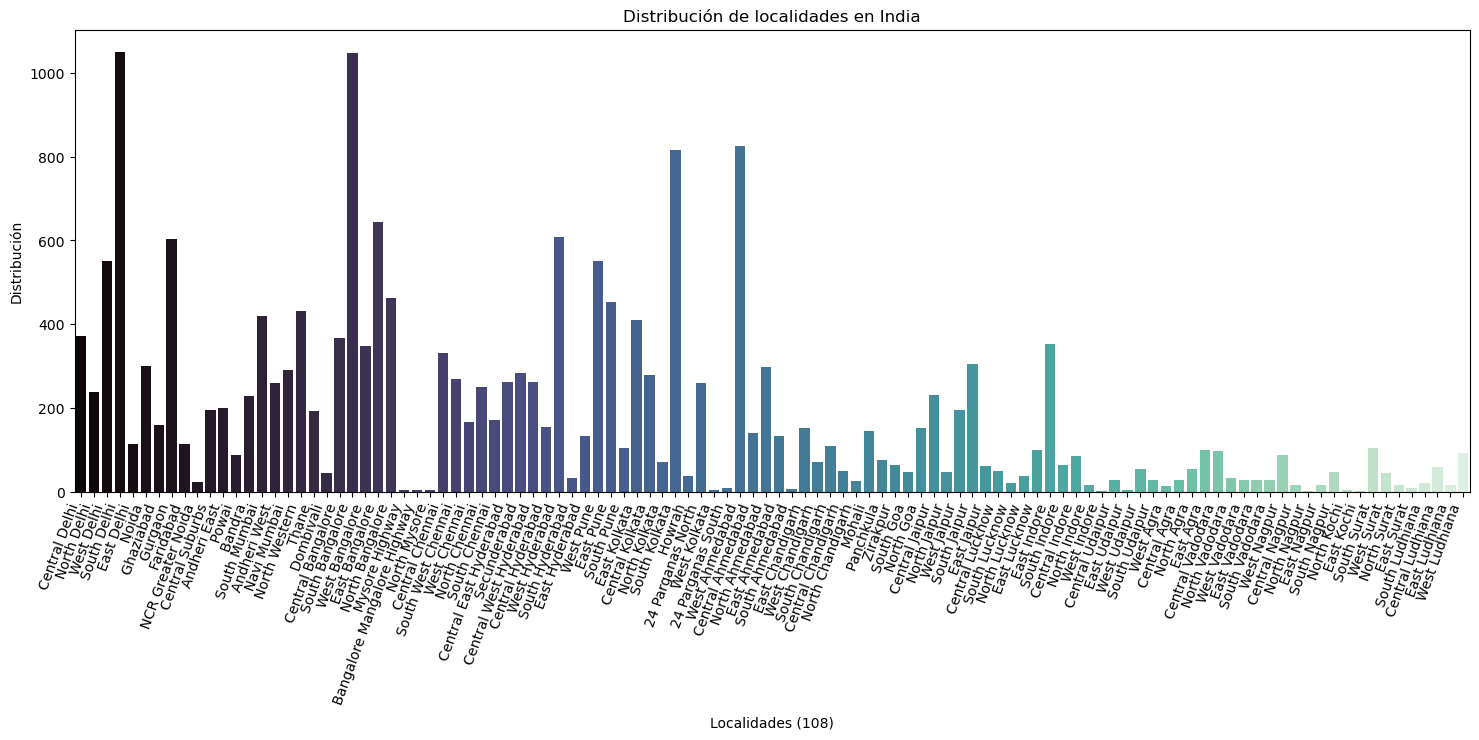

In [9]:
plt.figure(figsize=(18, 6))
ax = sns.countplot(x='Locality', data=data, palette='mako')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="right")
plt.title("Distribución de localidades en India")
plt.xlabel('Localidades (108)')
plt.ylabel('Distribución')
plt.show()

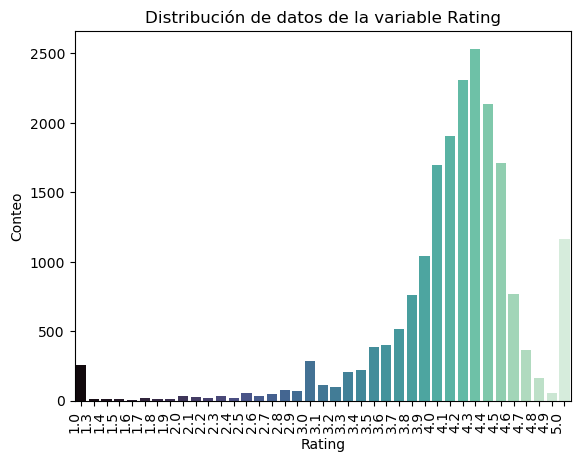

In [10]:
ax = sns.countplot(x='Rating', data=data, palette='mako')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title("Distribución de datos de la variable Rating")
plt.xlabel('Rating')
plt.ylabel('Conteo')
plt.show()

In [11]:
data["Cost"]= data.Cost.round(1)

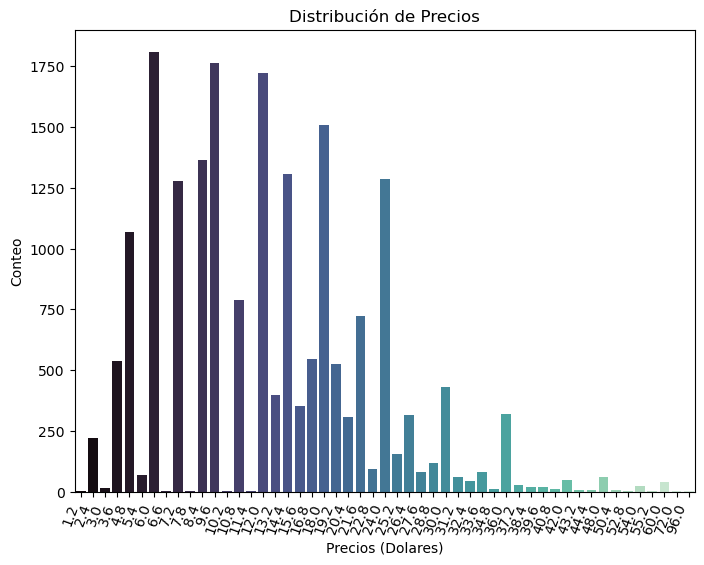

In [12]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Cost', data=data, palette='mako')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="right")
plt.title("Distribución de Precios")
plt.xlabel('Precios (Dolares)')
plt.ylabel('Conteo')
plt.show()

# Preprocesamiento de datos

Datos nulos

<Axes: >

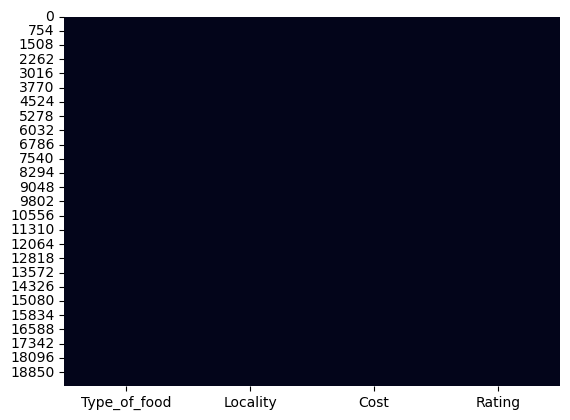

In [13]:
sns.heatmap(data.isnull(), cbar=False)

In [14]:
data.isnull().sum()

Type_of_food    0
Locality        0
Cost            0
Rating          0
dtype: int64

Depuración de datos

In [15]:
#Quitar espacios al inicio
data['Locality']=data['Locality'].str.strip()

In [16]:
data['Type_of_food']=data['Type_of_food'].str.strip()

Conversión de datos categoricos a numericos.
** Importante ** Estos Labels Encoder tienen que ser usados en el despliegue, ya que si no el sistema no podra utilizar datos categoricos

In [17]:
le_local = LabelEncoder()
le_coc = LabelEncoder()

In [18]:
# Crear una copia del DataFrame para evitar modificar el original
data_Encoded = data.copy()
data_Encoded['Locality']= le_local.fit_transform(data['Locality'])
data_Encoded['Type_of_food']= le_coc.fit_transform(data['Type_of_food'])

In [19]:
#le_local.classes_

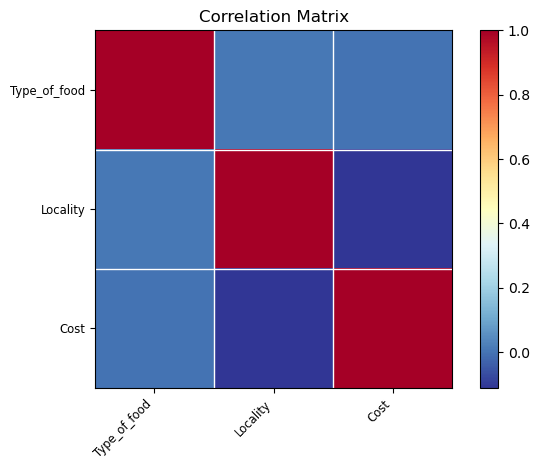

In [20]:
corr = data_Encoded.set_index('Rating').corr() 
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

# Variables de interes

In [21]:
#Redondeamos los valores de Rating para convertirlo en un problema de clasificación
data_Encoded.Rating= data_Encoded['Rating'].round(0)

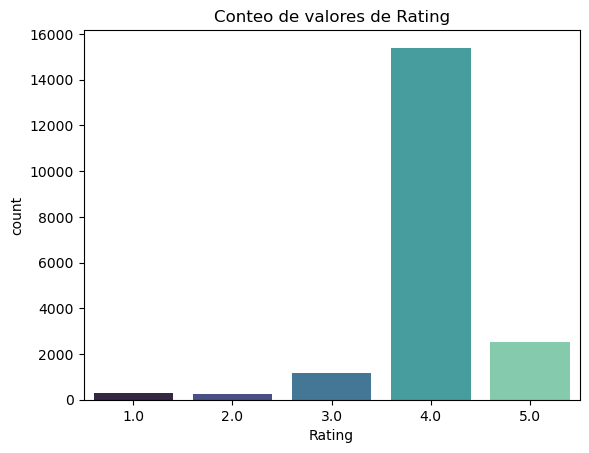

In [22]:
sns.countplot(x='Rating', data=data_Encoded, palette='mako')
plt.title("Conteo de valores de Rating")
plt.show()

In [23]:
y= data_Encoded['Rating']
x= data_Encoded.drop(["Rating"], axis=1)

In [24]:
y.value_counts()

Rating
4.0    15394
5.0     2517
3.0     1161
1.0      276
2.0      244
Name: count, dtype: int64

# Balanceo de datos
Primero correr sin balanceo, luego aplicar balancero

In [25]:
'''
plt.scatter(x.Locality, x.Type_of_food, c=y, s=y, alpha=0.5)
plt.colorbar(label='Y')
plt.show()'''

"\nplt.scatter(x.Locality, x.Type_of_food, c=y, s=y, alpha=0.5)\nplt.colorbar(label='Y')\nplt.show()"

## Undersampling

In [26]:
#under_sample = RandomUnderSampler(sampling_strategy='all')
#x,y = under_sample.fit_resample(x,y)
#y_under= pd.Series(y)
#y_under.value_counts()

## Oversample with Smote

In [27]:
#oversample= SMOTE()
#x, y = oversample.fit_resample(x,y)
#y.value_counts()

In [28]:
#sns.countplot(x='Rating', data= pd.DataFrame(y), palette='mako')
#plt.title("Count of Survival")
#plt.show()

## Oversample con RandomOversample

In [29]:
over_sample = RandomOverSampler(sampling_strategy='all')
x,y = over_sample.fit_resample(x,y)

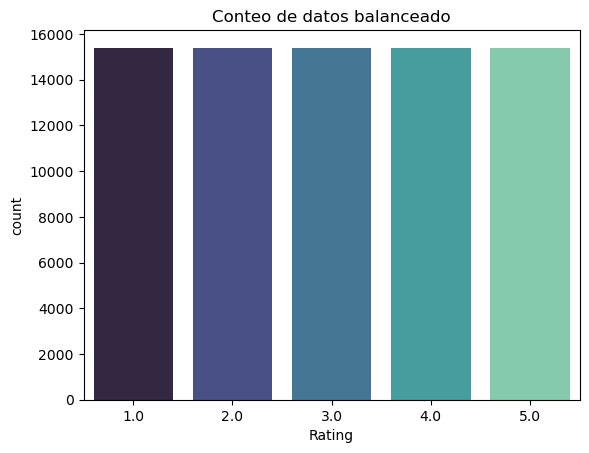

In [30]:
sns.countplot(x='Rating', data= pd.DataFrame(y), palette='mako')
plt.title("Conteo de datos balanceado")
plt.show()

# Separación de datos

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123)

# Regresión RandomForests

In [32]:
#RF_model = RandomForestRegressor(max_depth=25)

In [33]:
#Entrenamiento del modelo
#RF_model.fit(X_train, y_train)

In [34]:
#ypred_rftrain =RF_model.predict(X_train)
#ypred_rf= RF_model.predict(X_test)

In [35]:
#print('MAE:', mean_absolute_error(y_test,ypred_rf))
#print('MSE:', mean_squared_error(y_test,ypred_rf))
#print('R2:', r2_score(y_test, ypred_rf))

# Clasificación por Árbol de decisión

In [36]:
modelDTC= DecisionTreeClassifier(random_state=123) 

In [37]:
modelDTC.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

In [38]:
modelDTC.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [39]:
print(f"Profundidad del árbol: {modelDTC.get_depth()}")
print(f"Número de nodos terminales: {modelDTC.get_n_leaves()}")

Profundidad del árbol: 29
Número de nodos terminales: 4261


In [40]:
ypred_dttrain =modelDTC.predict(X_train)
ypred_dt= modelDTC.predict(X_test)

In [41]:
DT_accuracy_train = accuracy_score(y_train, ypred_dttrain)
print('Precisión en el conjunto de entrenamiento (usando accuracy_score):', DT_accuracy_train)
DT_accuracy_test = accuracy_score(y_test, ypred_dt)
print('Precisión en el conjunto de prueba (usando accuracy_score):', DT_accuracy_test)

Precisión en el conjunto de entrenamiento (usando accuracy_score): 0.8555606080291023
Precisión en el conjunto de prueba (usando accuracy_score): 0.8249967519812914


In [42]:
print(classification_report(y_test, ypred_dt,zero_division=0))

              precision    recall  f1-score   support

         1.0       0.81      0.93      0.87      3056
         2.0       0.83      0.93      0.88      3094
         3.0       0.79      0.83      0.81      3076
         4.0       0.93      0.68      0.79      3104
         5.0       0.79      0.75      0.77      3064

    accuracy                           0.82     15394
   macro avg       0.83      0.83      0.82     15394
weighted avg       0.83      0.82      0.82     15394



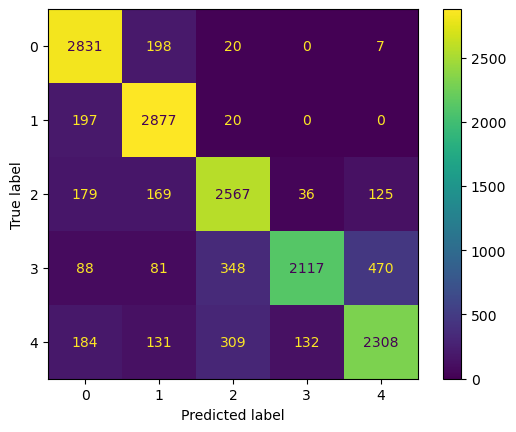

In [43]:
cm_dt=confusion_matrix(y_test, ypred_dt, labels=modelDTC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot()
plt.show()

# Clasificación RandomForests

In [44]:
RF_model = RandomForestClassifier(max_depth=30,n_estimators= 500, random_state=42)

In [45]:
RF_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [46]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=500, random_state=42)

In [47]:
ypred_rftrain =RF_model.predict(X_train)
ypred_rf= RF_model.predict(X_test)

In [48]:
rf_accuracy_train = accuracy_score(y_train, ypred_rftrain)
print('Precisión en el conjunto de entrenamiento (usando accuracy_score):', rf_accuracy_train)
rf_accuracy_test = accuracy_score(y_test, ypred_rf)
print('Precisión en el conjunto de prueba (usando accuracy_score):', rf_accuracy_test)

Precisión en el conjunto de entrenamiento (usando accuracy_score): 0.8555606080291023
Precisión en el conjunto de prueba (usando accuracy_score): 0.8270105235806158


In [49]:
print(classification_report(y_test, ypred_rf,zero_division=0))

              precision    recall  f1-score   support

         1.0       0.81      0.93      0.87      3056
         2.0       0.83      0.93      0.88      3094
         3.0       0.80      0.83      0.81      3076
         4.0       0.93      0.69      0.79      3104
         5.0       0.79      0.76      0.77      3064

    accuracy                           0.83     15394
   macro avg       0.83      0.83      0.82     15394
weighted avg       0.83      0.83      0.82     15394



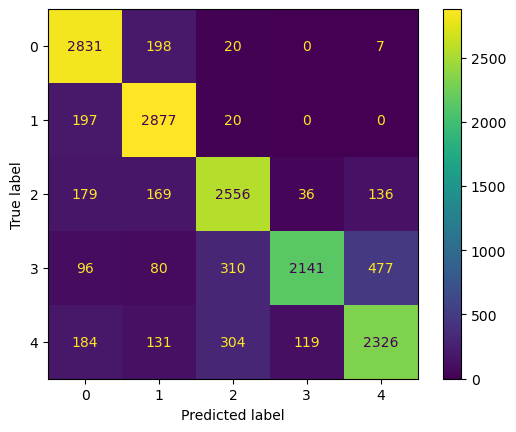

In [50]:
cm_rf=confusion_matrix(y_test, ypred_rf, labels=RF_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.show()

# LogisticRegressor

In [51]:
modelLRCV = LogisticRegressionCV( Cs=np.logspace(-5,5, 50),
                                  penalty='l2',
                                  scoring='accuracy', cv=5,
                                  random_state=42,max_iter=1000)

In [52]:
modelLRCV.get_params()

{'Cs': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
        6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
        4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
        2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
        1.84206997e-02, 2.94705170e-02, 4.71486636e-02, 7.54312006e-02,
        1.20679264e-01, 1.93069773e-01, 3.08884360e-01, 4.94171336e-01,
        7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
        5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
        3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
        2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
        1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
        9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
        6.25055193e+04, 1.00000000e+05]),
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_sca

In [53]:
modelLRCV.fit(X_train, y_train)


LogisticRegressionCV(Cs=array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e-02, 4.71486636e-02, 7.54312006e-02,
       1.20679264e-01, 1.93...
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05]),
                     cv=5, max_iter=1000, random_state=42, scoring='accuracy')

In [54]:
print("Mejor valor de C:", modelLRCV.C_)
print("Precisión media máxima:", modelLRCV.scores_[1].mean(axis=0).max())

Mejor valor de C: [0.00016768 0.00016768 0.00016768 0.00016768 0.00016768]
Precisión media máxima: 0.3141646217873175


In [55]:
ypred_lrtrain =modelLRCV.predict(X_train)
ypred_lr= modelLRCV.predict(X_test)

In [56]:
lr_accuracy_train = accuracy_score(y_train, ypred_lrtrain)
print('Precisión en el conjunto de entrenamiento (usando accuracy_score):', lr_accuracy_train)
lr_accuracy_test = accuracy_score(y_test, ypred_lr)
print('Precisión en el conjunto de prueba (usando accuracy_score):', lr_accuracy_test)

Precisión en el conjunto de entrenamiento (usando accuracy_score): 0.3139372482785501
Precisión en el conjunto de prueba (usando accuracy_score): 0.31609718071976095


In [57]:
print(classification_report(y_test, ypred_lr,zero_division=0))

              precision    recall  f1-score   support

         1.0       0.30      0.54      0.38      3056
         2.0       0.29      0.33      0.31      3094
         3.0       0.26      0.13      0.17      3076
         4.0       0.42      0.51      0.46      3104
         5.0       0.21      0.08      0.11      3064

    accuracy                           0.32     15394
   macro avg       0.30      0.32      0.29     15394
weighted avg       0.30      0.32      0.29     15394



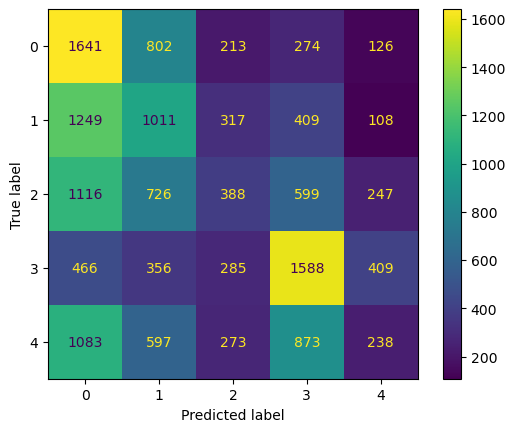

In [58]:
cm_lr=confusion_matrix(y_test, ypred_lr, labels=modelLRCV.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot()
plt.show()

# Support Vector Classificator

In [59]:
#parameters={'C': [0.01, 0.1, 1, 10, 100]}

In [68]:
SVC_model= SVC(kernel='rbf', C=100)

In [69]:
SVC_model.get_params()

{'C': 100,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [70]:
SVC_model.fit(X_train, y_train)

SVC(C=100)

In [71]:
ypr_train= SVC_model.predict(X_train)
ypr_test= SVC_model.predict(X_test)

In [63]:
svc_accuracy_train = accuracy_score(y_train, ypr_train)
print('Precisión en el conjunto de entrenamiento (usando accuracy_score):', svc_accuracy_train)
svc_accuracy_test = accuracy_score(y_test, ypr_test)
print('Precisión en el conjunto de prueba (usando accuracy_score):', svc_accuracy_test)

Precisión en el conjunto de entrenamiento (usando accuracy_score): 0.29566714304274394
Precisión en el conjunto de prueba (usando accuracy_score): 0.30141613615694424


In [64]:
print(classification_report(y_test, ypr_test,zero_division=0))

              precision    recall  f1-score   support

         1.0       0.28      0.42      0.33      3056
         2.0       0.30      0.30      0.30      3094
         3.0       0.24      0.29      0.26      3076
         4.0       0.44      0.43      0.43      3104
         5.0       0.23      0.07      0.11      3064

    accuracy                           0.30     15394
   macro avg       0.30      0.30      0.29     15394
weighted avg       0.30      0.30      0.29     15394



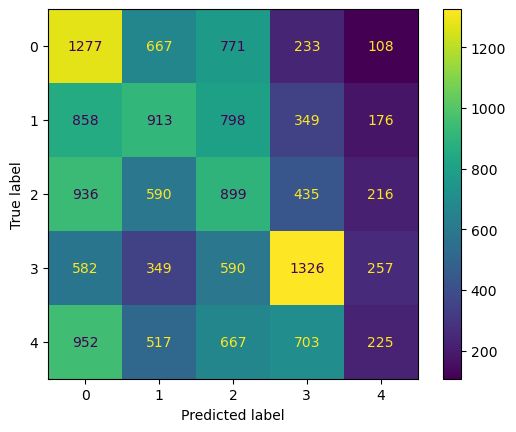

In [65]:
cm_csv=confusion_matrix(y_test, ypr_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_csv)
disp.plot()
plt.show()

# Exportar para uso en aplicación

In [66]:
data_indian.to_csv('Data_Lectura_features.csv', index=False)

NameError: name 'data_indian' is not defined

In [ ]:
import joblib

#Guardar los label Encoder

joblib.dump(le_coc, 'label_encoder_tipo_comida.joblib')

In [ ]:
joblib.dump(le_local, 'label_encoder_localidad.joblib')

In [ ]:
joblib.dump(RF_model, 'modelo_RF_classificador.joblib')

In [ ]:
import joblib
print(joblib.__version__)